In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
one_hot = pd.get_dummies(mall_data['Gender'])
mall_data = mall_data.join(one_hot)

In [7]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [30]:
X = mall_data[['Annual Income (k$)','Spending Score (1-100)']]

In [37]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
# Using Elbow Method to determine the best value of k
from sklearn import metrics
from scipy.spatial.distance import cdist

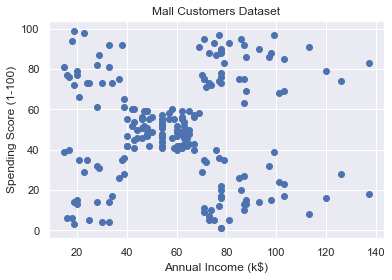

In [32]:
plt.plot()
plt.title('Mall Customers Dataset')
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Elbow Method for optimal value of number of klusters in KMeans
## METHOD 1

In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

In [36]:
mapping2

{1: 269981.28000000014,
 2: 181363.59595959607,
 3: 106348.37306211119,
 4: 73679.78903948837,
 5: 44448.45544793369,
 6: 37265.86520484345,
 7: 30241.34361793659,
 8: 25336.94686147186,
 9: 21850.16528258562,
 10: 19634.554629349972}

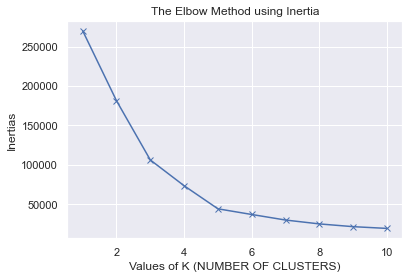

In [45]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K (NUMBER OF CLUSTERS)')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertia')
plt.show()

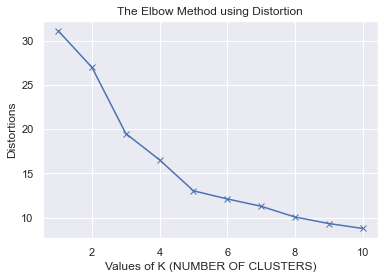

In [47]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K (NUMBER OF CLUSTERS)')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion')
plt.show()

## METHOD 2

In [43]:
# WCSS - Within-Cluster Sum of Square
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

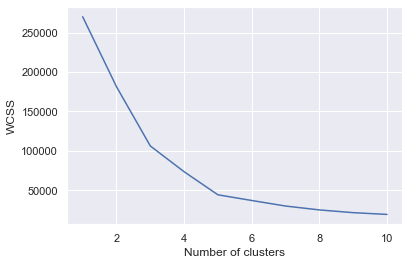

In [48]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [49]:
# Selecting 5 as the optimum value for n_clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [50]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

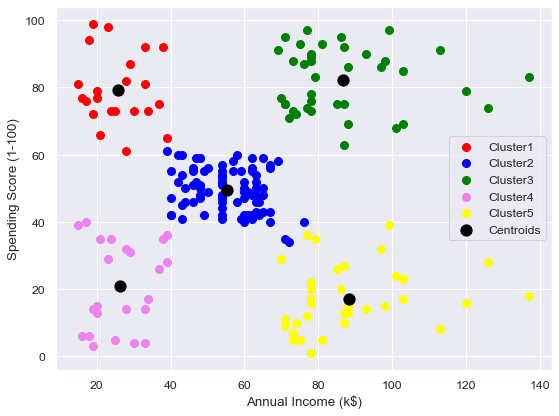

In [81]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 50, c = 'violet', label = 'Cluster4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 50, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #These shows the keys represented by colours

plt.show()

### My Inference
```
So optimally we have 5 clusters of customers
Cluster 1 - Low annual income but higher spenders
Cluster 2 - Average annual income and average spenders
Cluster 3 - High annual income and higher spenders
Cluster 4 - Low annual income and low spenders
Cluster 5 - High annual income but low spenders
```

```
Therefore, marketing should be channeled more to Cluster 5 customers who surprisingly spend less but have a high annual income.
Then efforts should be made to preserve all customers but most especially customers in Cluster 2, 3 and 4.
Products that are more affordable should be marketed more to customers in Cluster 1 to avoid losing them in the long run due to depts they could incure.
```